# Принятие решений в бизнесе на основе данных

## Оглавление


1. [Описание проекта](#describe)

   [Цель проекта](#purpose)
   

2. [Загрузка и подготовка данных](#download)

   [Описание данных](#date)
   
      [Данные для первой части](#first)
      
      [Данные для второй части](#second)
      
   [Подготовка данных](#preparation)
   
   [Выводы](#conclusion2)
   
   
3. [Часть 1. Приотиризация гипотез](#part1)

   [Выводы](#conclusion3)
   
   
4. [Часть 2. Анализ А/В-теста](#part2)


5. [Выводы и предложения](#conclusions)




<a id="describe"></a>
## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.
<a id="purpose"></a>
### Цель проекта

Цель работы: выявить гипотезы для увеличения выручки интернет- магазина. Для достижения поставленной цели необходимо выполнить следующие задачи:
- приоритизировать гипотезы,
- запустить A/B-тест,
- проанализировать результаты.

<a id="download"></a>
## Загрузка и подготовка данных

<a id="date"></a>
### Описание данных

<a id="first"></a>
#### Данные для первой части


Файл /datasets/hypothesis.csv:


 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
<a id="second"></a>
#### Данные для второй части


Файл /datasets/orders.csv:


 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.
 
 
Файл /datasets/visitors.csv:


 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста


Загрузим файлы. Первый взгляд на данные.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
path = 'C:\\Users\plea\OneDrive\Документы\Практикум\Проекты для гитхаб\АВ тест'
hypothesis = pd.read_csv(path + '/hypothesis.csv')
orders = pd.read_csv(path + '/orders.csv')
visitors = pd.read_csv(path + '/visitors.csv')
pd.set_option('max_colwidth', 400)

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

С гипотезами все хорошо. Если только поправить названия столбцов. Посмотрим на остальные данные.

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [9]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
orders.duplicated().sum()

0

In [11]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

В таблице orders в целом всё хорошо: дубликатов и пропусков нет, отрицательных значений в столбце с выручкой тоже. Стоит поправить названия столбцов transactionId, visitorsId, изменить тип данных в столбце date с object на datetime, проверить диапазон дат.

In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [15]:
visitors['visitors'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

In [16]:
visitors.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

In [17]:
visitors.duplicated().sum()

0

В таблице visitors необходимо привести даты к корректному типу. В остальном всё хорошо: пропусков, дубликатов, отрицательных значений в столбце с количеством визитёров нет.


<a id="preparation"></a>
### Подготовка данных

In [18]:
hypothesis.set_axis(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], axis='columns', inplace=True)


orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.set_axis(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], axis='columns', inplace=True)


visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [19]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [22]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [23]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [24]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [25]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

### Выводы
<a id="conclusion2"></a>
Данные привели в необходимый вид. Названия столбцов и типы данных корректны. Диапазон дат корректен: с 1 по 31 августа. Можем приступать к работе.

## Часть 1. Приоритизация гипотез.
<a id="part1"></a>

В файле hypothesis 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort:

 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
 - Запустить собственную службу доставки, что сократит срок доставки заказов,
 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,
 - Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар,
 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей,
 - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов,
 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию,
 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
 - Запустить акцию, дающую скидку на товар в день рождения.


Применим фреймворки ICE и RICE для приоритизации гипотез.

In [26]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Приоритетные гипотезы: скидка на день рождения, два новых канала привлечения трафика, форма подписки, баннеры с актуальными акциями на главной странице и блоки рекомендаций товаров.

In [27]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


По фреймворку RICE в приоритете оказались те же гипотезы, но в другом порядке: форма подписки, блоки рекомендаций, два новых канала привлечения трафика, баннеры с актуальными акциями и скидка на день рождения. Построим точечную диаграмму.

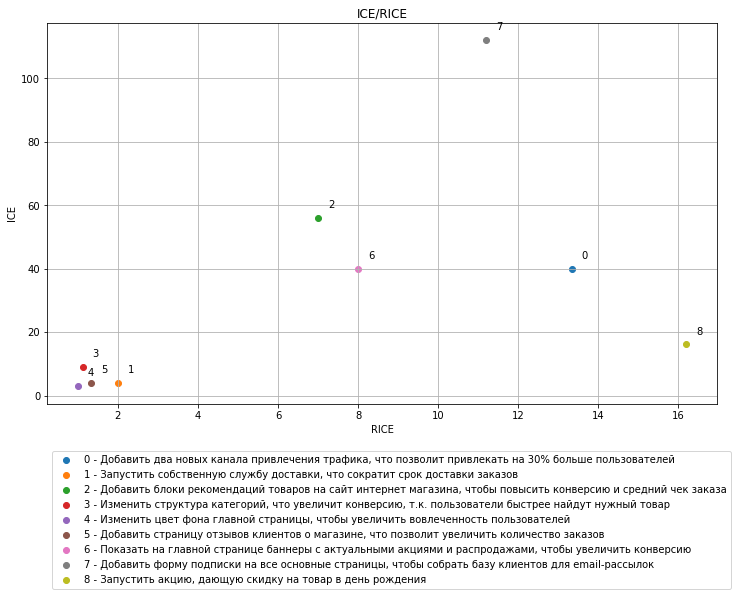

In [28]:

fig, ax = plt.subplots(figsize=(12, 7))

ax.set_xlabel('RICE')
ax.set_ylabel('ICE')
ax.set_title('ICE/RICE')

for i, txt in enumerate(hypothesis.index.values):
    legend = (str(txt) + ' - ' + str(hypothesis['hypothesis'][i]))    
    ax.annotate(txt, (hypothesis['ICE'][i], hypothesis['RICE'][i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(hypothesis['ICE'][i], hypothesis['RICE'][i], label = legend)
    
plt.grid(True)  
plt.legend(loc="lower left",  bbox_to_anchor=(0, -0.5))

plt.show()

### Выводы
<a id="conclusioin3"></a>
Гипотеза "Запустить акцию, дающую скидку на день рождения" по фреймворку ICE первая, но по фреймворку RICE она на пятом месте: охват пользователей маловат, не смотря на хорошее влияние и средние затраты. Параметр Confidence у этой гипотезы самый высокий.

Следующая по ICE гипотеза "Добавить два новых канала привлечения трафика" по RICE на третьем месте: охват пользователей оценён в 3 балла, влияние максимально, затраты самые большие из выбранных гипотез. 

Гипотеза "Добавить форму подписки на все основные страницы" по ICE третья, по RICE первая: охват максимальный, влияние хорошее, затраты средние. 

Гипотеза "Показать на главной странице баннеры с актуальными акциями" по обоим фреймворкам на четвертом месте: охват небольшой, влияние не сильное, но и затрат немного, параметр Confidence самый низкий из выбранных гипотез. 

Гипотеза "Добавить блоки рекомендаций товаров на сайт" пятая по ICE и вторая по RICE: охват хороший, влияние и затраты несильные.

После применения фреймворка RICE порядок гипотез изменился в зависимости от параметра Reach. Гипотезы, у которых охват большой, переместились на более высокое положение. У некоторых гипотез охват не повлиял или повлиял не существенно, например, когда у гипотезы большие затраты или сильное влияние.,



## Часть 2. Анализ A/B-теста
<a id="part2"></a>


У нас есть определенные результаты A/B-теста.
Нам необходимо проанализировать эти результаты. Для этого:
1. Построим графики по группам:

     -  кумулятивной выручки,
     -  кумулятивного среднего чека,
     -  относительного изменения кумулятивного среднего чека группы B к группе A,
     -  кумулятивной конверсии по группам,
     -  относительного изменения кумулятивной конверсии группы B к группе A.
     
     
2. Построим точечный график количества заказов по пользователям. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
4. Построим точечный график стоимостей заказов. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
5. Посчитаем статистическую значимость различий в конверсии и в среднем чеке заказа между группами по «сырым» и «очищенным» данным. 

Примем решение по результатам теста. Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Для начала посмотрим не попали ли пользователи в обе группы.

In [29]:
orders_a = orders.query('group == "A"')
orders_agr = orders_a.groupby('visitor_id')['group'].count().reset_index()
list_id_a = orders_agr['visitor_id']
orders_b = orders.query('group == "B"')
orders_ab = orders_b.query('visitor_id in @list_id_a')
orders_abgr = orders_ab.groupby('visitor_id')['group'].count().reset_index()
list_id_ab = orders_abgr['visitor_id']
list_id_ab.head()

0      8300375
1    199603092
2    232979603
3    237748145
4    276558944
Name: visitor_id, dtype: int64

58 пользователей попали в обе группы. Удаляем, но помним об этом, поскольку скорее всего такое удаление скажется на результатах.

In [30]:
orders = orders.query('visitor_id not in @list_id_ab')

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
# Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна 
# группе из datesGroups
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] ==
                      x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 
                     'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
    visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
                                       axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


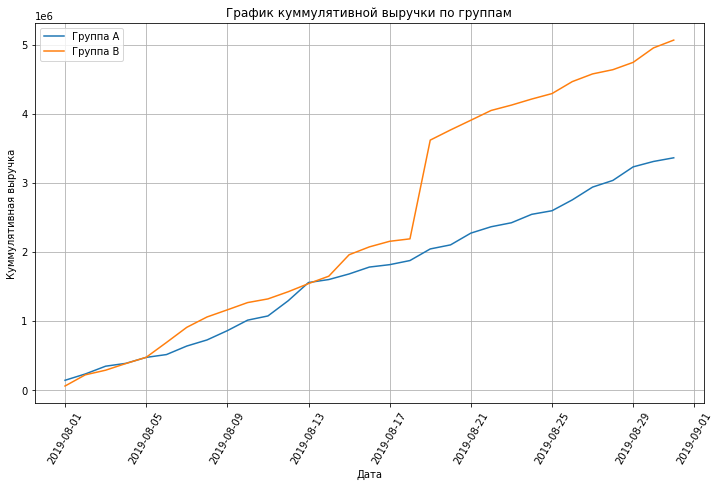

In [31]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12, 7))
plt.title('График куммулятивной выручки по группам')
plt.xlabel("Дата")
plt.ylabel("Куммулятивная выручка")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')
plt.xticks(rotation=60)
plt.legend()
plt.grid(True)
plt.show()

Куммулятивная выручка группы В стабильно выше выручки группы А. Судя по резкому скачку, скорее всего 19 августа в группе В был аномально крупный заказ. И 12-13 августа в группе А наблюдается скачок.

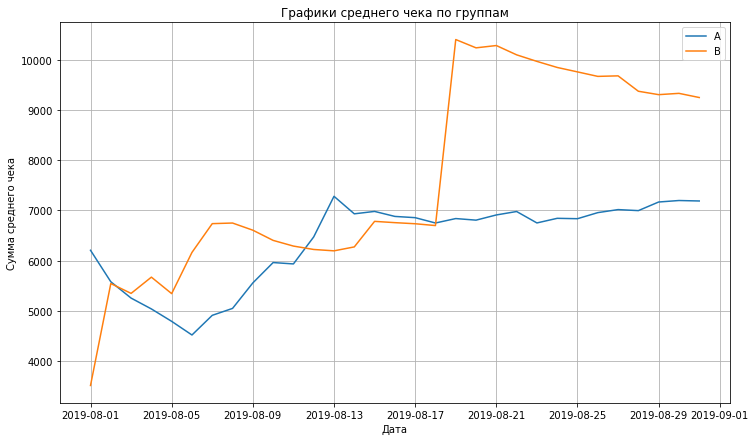

In [32]:
plt.figure(figsize=(12, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.grid(True)
plt.title('Графики среднего чека по группам')
plt.xlabel("Дата")
plt.ylabel("Сумма среднего чека")
plt.show()

По графикам среднего чека также виден аномальный скачок 19 августа в группе В и 13 августа в группе А. К концу теста значения установились.

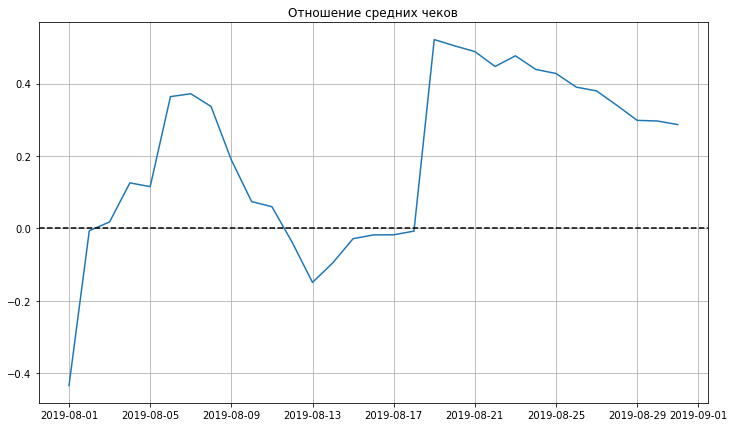

In [33]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left',
                                                   suffixes=['A', 'B'])
plt.figure(figsize=(12, 7))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Oтношение средних чеков')
plt.grid(True)
plt.show()

Отношение средних чеков подтверждает выводы, сделанные ранее: резкие скачки говорят о аномально больших заказах в обеих группах.

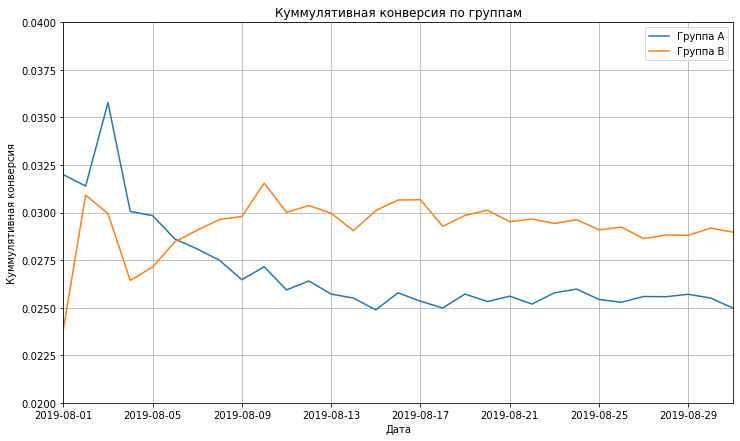

In [34]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12, 7))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Группа B')
plt.legend()

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0.02, 0.04])
plt.grid(True)
plt.title('Куммулятивная конверсия по группам')
plt.xlabel("Дата")
plt.ylabel("Куммулятивная конверсия")
plt.show()

К концу теста значения установились. Куммулятивная конверсия в группе В стабильно больше.

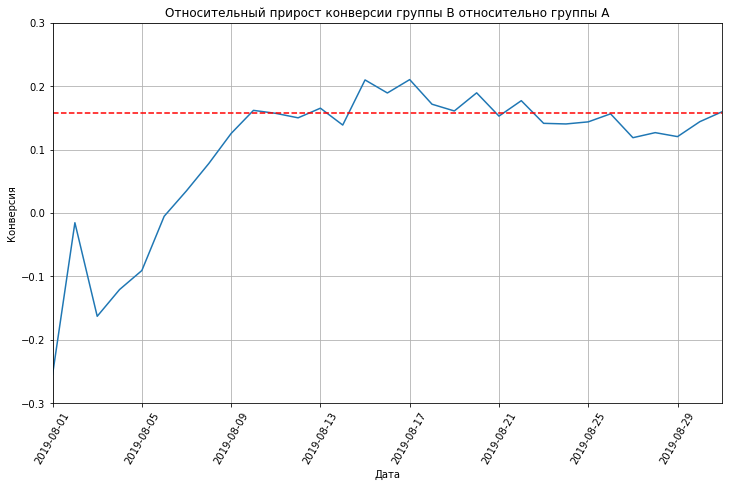

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
    mergedCumulativeConversions['conversionA']-1)
plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.xlabel("Дата")
plt.ylabel("Конверсия")
line = (mergedCumulativeConversions.query('date > "2019-08-08"')['conversionB']/
    mergedCumulativeConversions.query('date > "2019-08-08"')['conversionA']-1).mean()
plt.axhline(y = line, color='red', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.3, 0.3])
plt.grid(True)
plt.xticks(rotation=60)
plt.show()

В начале теста в приросте конверсии наблюдаются скачки, но к концу стабилизировался и в целом динамика положительная. Посмотрим как распределяется стоимость заказов. Построим точечную диаграмму стоимости заказов.

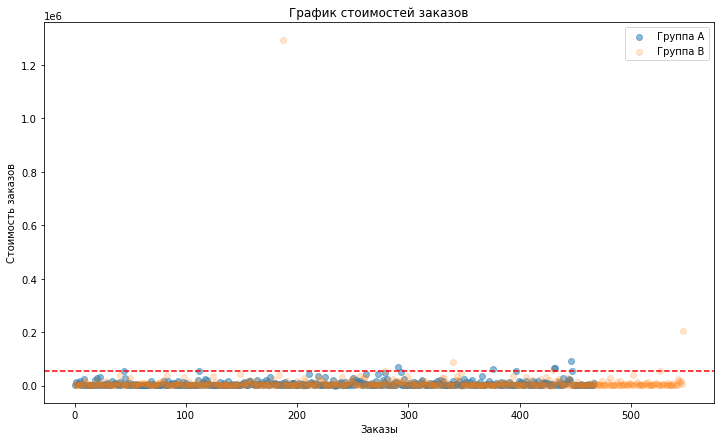

In [36]:
# Построим точечную диаграмму стоимости заказов
plt.figure(figsize=(12, 7))
orders_gra = orders.query('group == "A"')
orders_grb = orders.query('group == "B"')
# Посчитаем количество заказов
x_values_rev_a = pd.Series(range(0,len(orders_gra['revenue'])))
x_values_rev_b = pd.Series(range(0,len(orders_grb['revenue'])))
plt.scatter(x_values_rev_a, orders_gra['revenue'], label="Группа A", alpha=0.5) 
plt.scatter(x_values_rev_b, orders_grb['revenue'], label="Группа B", alpha=0.2) 
plt.title('График стоимостей заказов')
# Добавим линию, отсекающую 5% аномальных заказов
line = (np.percentile(orders['revenue'], 99))
plt.axhline(y = line, color='red', linestyle='--')
plt.xlabel("Заказы")
plt.ylabel("Стоимость заказов")
plt.legend()
plt.show()

In [37]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

Есть аномально дорогие заказы. Всего 5% заказов больше 26785. В группе В выбиваются два аномальных заказа. В целом аномально дорогими можно считать 1%.

In [38]:
# Посчитаем количество заказов по каждому покупателю по группам
ordersByUsers = (orders.drop(['revenue', 'date'], axis=1).groupby(['group', 'visitor_id'], as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))

ordersByUsers.columns = ['group', 'user_id', 'orders']
ordersByUsers_a = ordersByUsers.query('group == "A"')
ordersByUsers_b = ordersByUsers.query('group == "B"')
ordersByUsers_b.head()

,group,user_id,orders
445,B,5114589,1
446,B,6958315,1
447,B,39475350,1
448,B,47206413,1
449,B,48147722,1


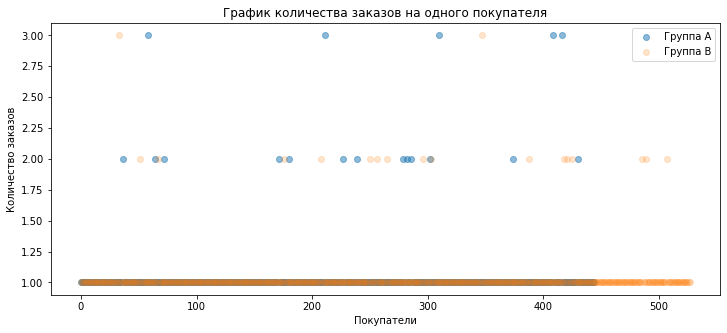

In [39]:
# Построим точечный график количества заказов на одного покупателя
plt.figure(figsize=(12, 5))
x_values_a = pd.Series(range(0,len(ordersByUsers_a)))
x_values_b = pd.Series(range(0,len(ordersByUsers_b)))
plt.title('График количества заказов на одного покупателя')
plt.xlabel("Покупатели")
plt.ylabel("Количество заказов")
plt.scatter(x_values_a, ordersByUsers_a['orders'], label="Группа A", alpha=0.5)
plt.scatter(x_values_b, ordersByUsers_b['orders'], label="Группа B", alpha=0.2)
plt.legend()
plt.show()

In [40]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

Больше двух раз заказывали только 1% покупателей. Почти все аномальные заказы отсеклись после удаления пользователей, попавших в обе группы, поэтому за границу аномальных заказов принимаем 1%.

Посчитаем статистическую значимость различия в конверсии между группами. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей. Подготовим выборки к проверке критерием Манна-Уитни. За нулевую принимаем гипотезу о том, что статистически значимых различий в конверсии между группами нет. За альтернативную гипотезу примем наличие статистически значимых различий. Определить характер этих различий нам поможет прирост конверсии группы В относительно группы А: если прирост положительный - конверсия больше в группе В, если отрицательный - то в группе А. Примем критический уровень статистической значимости alpha = 0.05.

In [41]:
# количество пользователей в выбранную дату в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
# количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# количество пользователей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# количество заказов и суммарная выручка в выбранную дату в группе A
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False).agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# суммарное число заказов и суммарная выручка до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

# количество заказов и суммарная выручка в выбранную дату в группе B
ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False).agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# суммарное количество заказов и суммарная выручка до выбранной даты включительно в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1).sort_values(by=['date'])

ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB',]

# Объединяем полученные результаты в одну таблицу
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))


# Выведем относительный прирост конверсии по группам
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))

ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - 
                    len(ordersByUsersB['orders'])), name='orders')], axis=0)
result = (stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]).round(4)
alpha = 0.05
print('p-значение: ', result)

if result < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

print('Относительный прирост конверсии в группе В относительно группы А:', "{0:.2%}".format(sampleB.mean() / 
                                                                                            sampleA.mean() - 1))


p-значение:  0.011
Отвергаем нулевую гипотезу: разница статистически значима.
Относительный прирост конверсии в группе В относительно группы А: 15.98%


Мы посчитали статистическую значимость различия в конверсии между группами по "сырым" данным. Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. На 15.98% группа В обогнала группу А. Посчитаем статистическую значимость различий в среднем чеке между группами. За нулевую гипотезу также примем гипотезу о том, что статистически значимых различий в среднем чеке между группами нет. За альтернативную соответственно - наличие статистически значимой разницы. Оставляем alpha = 0.05.

In [42]:
result_mr = (stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']
                                          ['revenue'], alternative = "two-sided")[1]).round(3)
print('p-значение: ', result_mr)

if result_mr < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.') 


print('Различие в среднем чеке между группами:', '{0:.2%}'.format(orders[orders['group']=='B']['revenue'].mean()/
                                                                  orders[orders['group']=='A']['revenue'].mean()-1))

p-значение:  0.829
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.
Различие в среднем чеке между группами: 28.66%


Мы рассчитали статистическую значимость различий в среднем чеке между сегментами. P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B  выше среднего чека группы A на 28.66%. 

Посмотрим как обстоят дела, если данные очистить от аномальных значений. Поскольку большая часть аномальных заказов отскеклась при удалении пользователей, попавших в обе группы, за границу аномальной зоны будем считать 1%, то есть те пользователи, кто заказывал более 2 раз и заказы дороже 56904.

In [43]:
orders_lim = np.percentile(ordersByUsers['orders'], 99)
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > orders_lim]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_lim]['visitor_id']], axis=0)
revenue_lim = np.percentile(orders['revenue'], 99)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64
(16,)



В аномальную зону попали 16 пользователей. Посчитаем статистическую значимость различия в конверсии между группами по "очищенным" данным. За нулевую гипотезу аналогично принимаем гипотезу о том, что статистически значимых различий в конверсии между группами нет. За альтернативную гипотезу примем наличие статистически значимых различий. Критический уровень статистической значимости оставляем прежним alpha = 0.05.

In [44]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders')], axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders')], axis=0)

result_filt_conv = (stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative="two-sided")[1]).round(3)
print('p-значение: ', result_filt_conv)

if result_filt_conv < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 


print('Относительный прирост конверсии в группе В относительно группы А:','{0:.2%}'.format(sampleBFiltered.mean() / 
                                                                                           sampleAFiltered.mean()-1))

p-значение:  0.007
Отвергаем нулевую гипотезу: разница статистически значима.
Относительный прирост конверсии в группе В относительно группы А: 18.92%


Результаты по конверсии изменились не сильно. Нулевую гипотезу отвергаем. Посмотрим, что со средним чеком. Аналогично расчёту по "сырым" данным, проверим гипотезу о наличии статистических различий средних чеков в группах. За нулевую гипотезу принимаем также отсутствие различий, за альтернативную - наличие.

In [45]:
result_filt_rev = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(
    orders['visitor_id'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(orders['group'] == 'B', 
                                np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]

difference_rev = orders[np.logical_and(orders['group'] == 'B', np.logical_not(
    orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',
                                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1

print('p-значение: ', result_filt_rev.round(3))

if result_mr < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.') 


print('Различие в среднем чеке между группами:', '{0:.2%}'.format(difference_rev))

p-значение:  0.394
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.
Различие в среднем чеке между группами: -3.23%


Нулевую гипотезу также не можем отвергнуть. По среднему чеку P-значение стало меньше, чем по "сырым" данным, а разница между сегментами уменьшилась с 28.66% до 3.23% и группа А лидирует. Два аномально дорогих заказа в группе В ощутимо влияют на средний чек. Построим график относительного прироста конверсии группы В относительно группы А по "очищенным" данным.

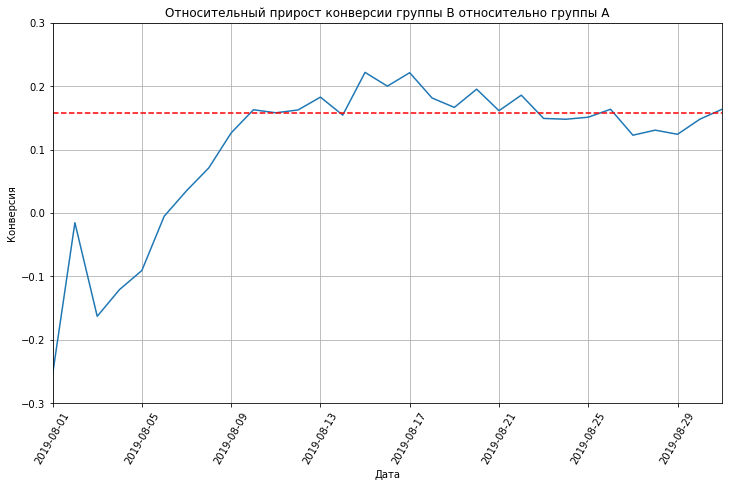

In [46]:
# "Очистим" данные от аномальных значений
ordersByUsersFilter = ordersByUsers.query('orders <= @orders_lim')
ordersFilter = orders.query('revenue <= @revenue_lim')

# создаем массив уникальных пар значений дат и групп теста
datesGroupsFilter = ordersFilter[['date','group']].drop_duplicates()
# Получим строки таблицы ordersFilter, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна 
# группе из datesGroups
ordersAggregatedFilter = datesGroupsFilter.apply(lambda x: ordersFilter[np.logical_and(ordersFilter['date'] <= x['date'],
        ordersFilter['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique,
        'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregatedFilter = datesGroupsFilter.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
    visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
                                       axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeDataFilter = ordersAggregatedFilter.merge(visitorsAggregatedFilter, left_on=['date', 'group'], 
                                                    right_on=['date', 'group'])
cumulativeDataFilter.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeDataFilter.head(5)
# считаем кумулятивную конверсию
cumulativeDataFilter['conversion'] = cumulativeDataFilter['orders'] / cumulativeDataFilter['visitors']

# отделяем данные по группе A
cumulativeDataAFilter = cumulativeDataFilter[cumulativeDataFilter['group']=='A']

# отделяем данные по группе B
cumulativeDataBFilter = cumulativeDataFilter[cumulativeDataFilter['group']=='B']
# Объединяем данные в одну таблицу
mergedCumulativeConversionsFilter = cumulativeDataAFilter[['date','conversion']].merge(cumulativeDataBFilter[
    ['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 7))
plt.plot(mergedCumulativeConversionsFilter['date'], mergedCumulativeConversionsFilter['conversionB']/
    mergedCumulativeConversionsFilter['conversionA']-1)
plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.xlabel("Дата")
plt.ylabel("Конверсия")
line = (mergedCumulativeConversions.query('date > "2019-08-08"')['conversionB']/
    mergedCumulativeConversions.query('date > "2019-08-08"')['conversionA']-1).mean()
plt.axhline(y = line, color='red', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.3, 0.3])
plt.grid(True)
plt.xticks(rotation=60)
plt.show()

По "очищенным" данным изменения в относительном приросте конверсии незначительны. За счет удаления аномальных заказов график стал более плавным. В целом значение установилось, динамика положительная.



## Выводы и предположения
<a id="conclusions"></a>
Куммулятивная выручка группы В стабильно выше выручки группы А. Судя по резкому скачку, скорее всего 19 августа в группе В был аномально крупный заказ. И 12-13 августа в группе А наблюдается скачок.
По графикам среднего чека также виден аномальный скачок 19 августа в группе В и 13 августа в группе А. К концу теста значения установились. Группа В лидирует.
Куммулятивная конверсия в группе В стабильно больше.
Относительный прирост конверсии группы В относительно группы А к концу теста стабилизировался и в целом динамика положительная.
По "сырым" данным в конверсии есть статистически значимые отличия. На 15.98% группа В обогнала группу А.
В среднем чеке статистически значимых различий нет. Но средний чек группы B на 28.66% выше среднего чека группы A. 
За границу аномальной зоны принимаем 1%, то есть тех, кто заказывал более двух заказов и заказы дороже 56904.
Значение конверсии по "очищенным" данным изменилось мало: статистически значимые отличия в конверсии есть. Группа В обгоняет группу А на 18.92%.
По среднему чеку P-value уменьшилось с 0.829 до 0.394, разница между сегментами уменьшилась  до 3.23% и группа А лидирует.
На основе имеющихся данным мы можем сделать вывод, что тест прошёл успешно и принять решение: остановить тест, зафиксировать победу группы В.